In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
y = df_train.iloc[:, 0]
X = df_train.iloc[:, 1:]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 0)

df_test = pd.read_csv('test.csv')
y_test = df_test.iloc[:, 0]
x_test = df_test.iloc[:, 1:]


<AxesSubplot:xlabel='label', ylabel='count'>

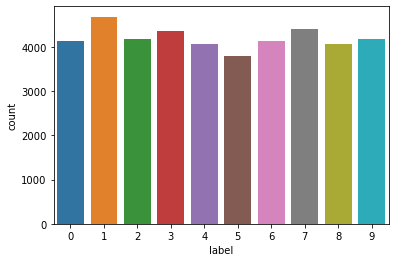

In [ ]:
sns.countplot(x = y)

Uniform Distribution of labels

In [ ]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.130268,0.064226,0.021429,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.578347,4.818621,3.437205,1.839529,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


We can already see from the truncated display of the describe method, that there are some pixels which are mostly irrelevant to the data set-- The first 10 pixels are always 0, for example.

We should also consider normalizing the data, as opposed to leaving it at 0-255

#### Mean Images

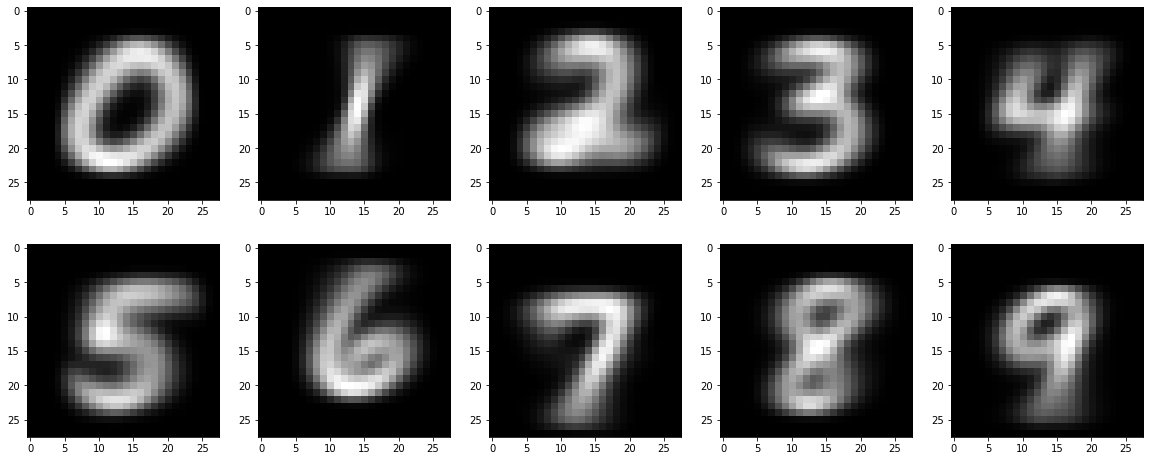

In [ ]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    images = np.array(np.mean(X[y == i], axis =0)).reshape(28,28)
    plt.imshow(images, 'gray')


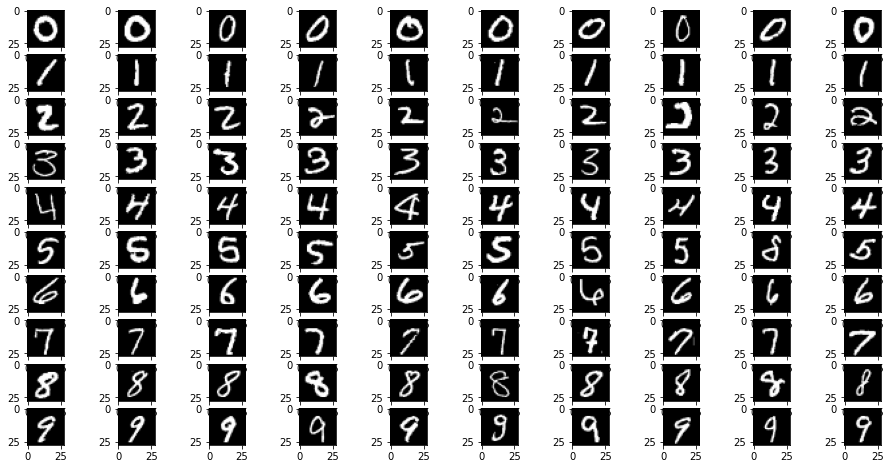

In [7]:
fig = plt.figure(figsize= (16,8))
x = 1
for i in range(10):
    digit = np.array(X[y==i])
    for j in range(10):
        number = digit[j].reshape(28,28)
        plt.subplot(10,10, x)
        plt.imshow(number, 'gray')
        x+=1

We can see, there is some high variance in the drawings of each digit: There are some 4's which could understandably be mistaken for a 9, 5's for 6's, and there are some 6's which even look like 4's.

# Modeling

### KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(classification_report(y_val, knn.predict(x_val)))


C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       813
           1       0.96      0.99      0.98       961
           2       0.98      0.96      0.97       860
           3       0.96      0.97      0.96       863
           4       0.98      0.96      0.97       827
           5       0.96      0.97      0.96       756
           6       0.97      1.00      0.98       841
           7       0.96      0.97      0.96       899
           8       0.99      0.91      0.95       768
           9       0.95      0.94      0.95       812

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [ ]:
grid_cv = GridSearchCV( KNeighborsClassifier(),
                param_grid= {'n_neighbors': np.arange(start = 1, stop = 29, step = 2), 'metric': ['minkowski', 'euclidean']},
                cv = 5);


grid_cv.fit(x_train, y_train);



In [69]:
grid_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 3}

In [ ]:
k_range = np.arange(start = 1, stop = 39, step = 2)
train_scores = []
val_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k).fit(x_train, y_train)
    
    F1 = f1_score(y_train, knn.predict(x_train), average = 'macro')
    train_scores.append(F1)

    F1 = f1_score(y_val, knn.predict(x_val), average = 'macro')
    val_scores.append(F1)

<AxesSubplot:>

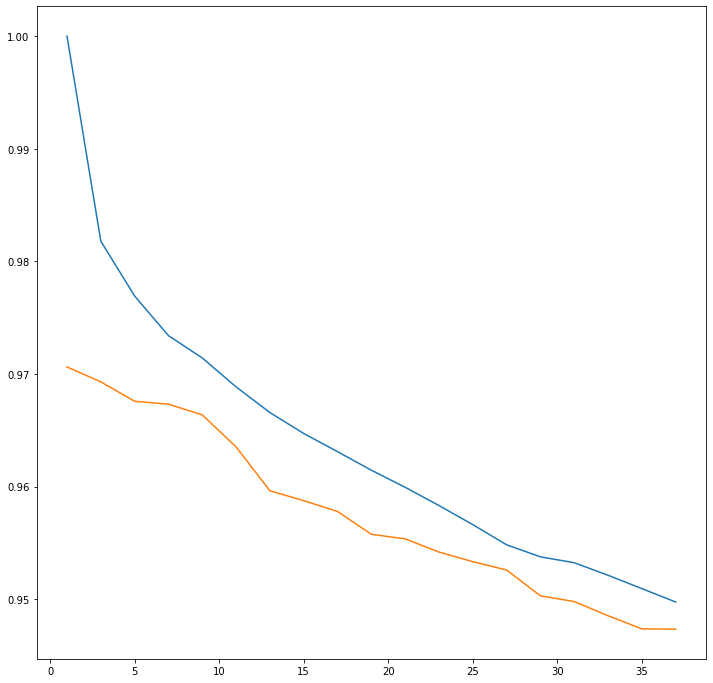

In [75]:
fig = plt.figure(figsize = (12,12))
sns.lineplot(x = k_range, y = train_scores, markers = 'o'  )
sns.lineplot(x = k_range, y = val_scores, markers = 'o' )


In [4]:
k_range = np.arange(start = 1, stop = 15, step = 2)
train_scores = []
val_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k).fit(x_train, y_train)
    
    acc = accuracy_score(y_train, knn.predict(x_train))
    train_scores.append(acc)

    acc = accuracy_score(y_val, knn.predict(x_val))
    val_scores.append(acc)

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not h

<AxesSubplot:>

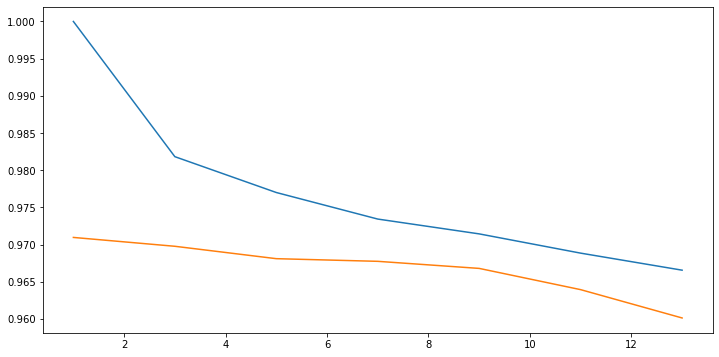

In [5]:
fig = plt.figure(figsize = (12,6))
sns.lineplot(x = k_range, y = train_scores, markers = 'o'  )
sns.lineplot(x = k_range, y = val_scores, markers = 'o' )


### Multinomial Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB(alpha = 0.1)
NB.fit(x_train, y_train)
classification_report(y_val, NB.predict(x_val))

### Regression

### Decision Tree

### Random Forest

### Stacking

### T-SNE